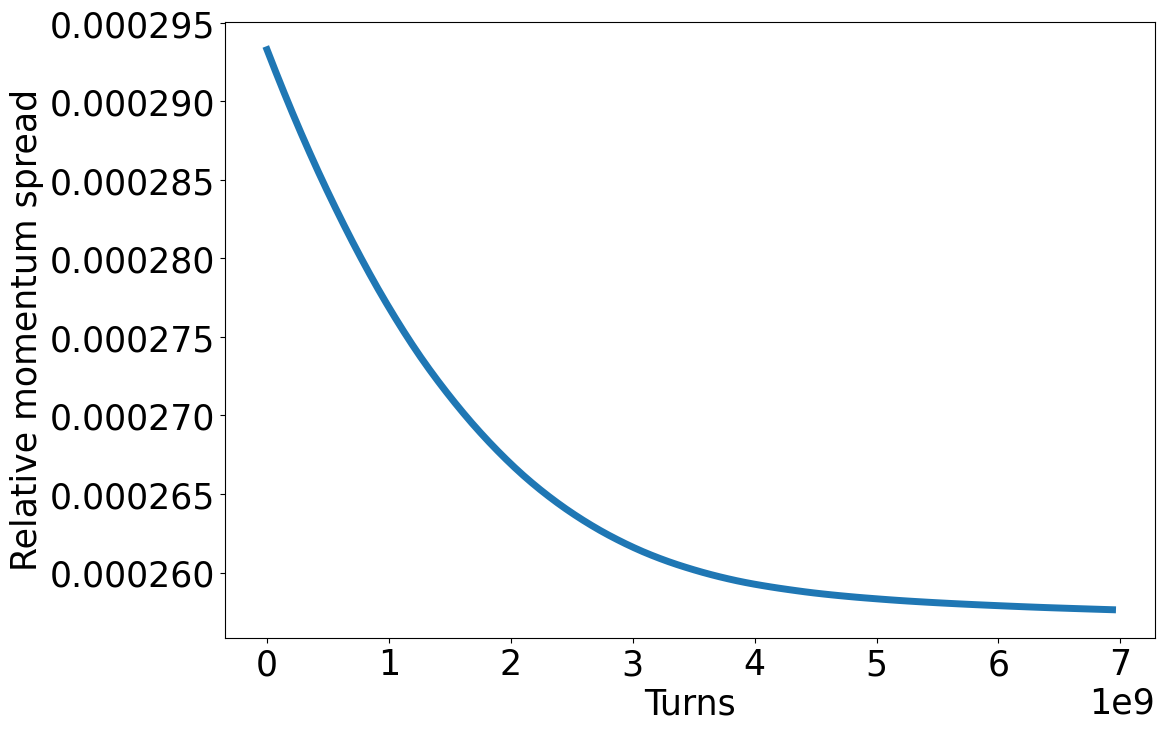

In [1]:
import numpy as np
import matplotlib.pyplot as plt


loaded_data = np.load('results/delta_data.npz')
#dp_p_list = loaded_data['dp_p_list']
delta    = loaded_data['delta']
excited = loaded_data['excited']
x = loaded_data['x']*1e3
time = loaded_data['time']

delta_std = np.std(delta, axis=1)

fraction_excited=[]
for i in range(len(excited)):
    fraction_excited.append(100*sum(excited[i])/len(excited[i]))

revolution_frequency = 200*1e6
s_per_turn = 1/revolution_frequency
num_turns=time/s_per_turn

cmap = plt.get_cmap("tab10")
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.plot(num_turns,delta_std, label=f'xsuite',color=cmap(0), linewidth=5.0)
# plt.xlabel(r'Time [$\mu$ s]')
plt.xlabel(r'Turns')
plt.ylabel(r'Relative momentum spread')
#plt.legend()
# plt.savefig('ELENA:emittance_default_parameters.png', dpi=300)
# plt.savefig('ELENA:emittance_default_parameters.eps', dpi=300)
plt.show()





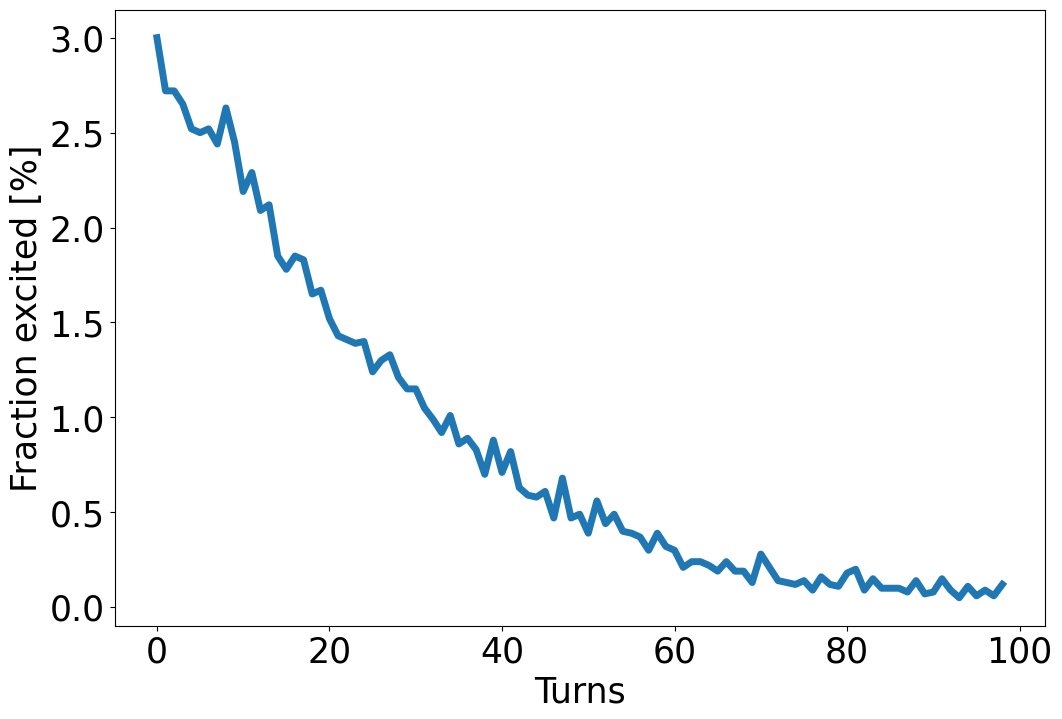

In [2]:
cmap = plt.get_cmap("tab10")
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.plot(fraction_excited[1::], label=f'xsuite',color=cmap(0), linewidth=5.0)
plt.xlabel(r'Time [$\mu$ s]')
plt.xlabel(r'Turns')
plt.ylabel(r'Fraction excited [%]')
#plt.legend()
# plt.savefig('ELENA:emittance_default_parameters.png', dpi=300)
# plt.savefig('ELENA:emittance_default_parameters.eps', dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


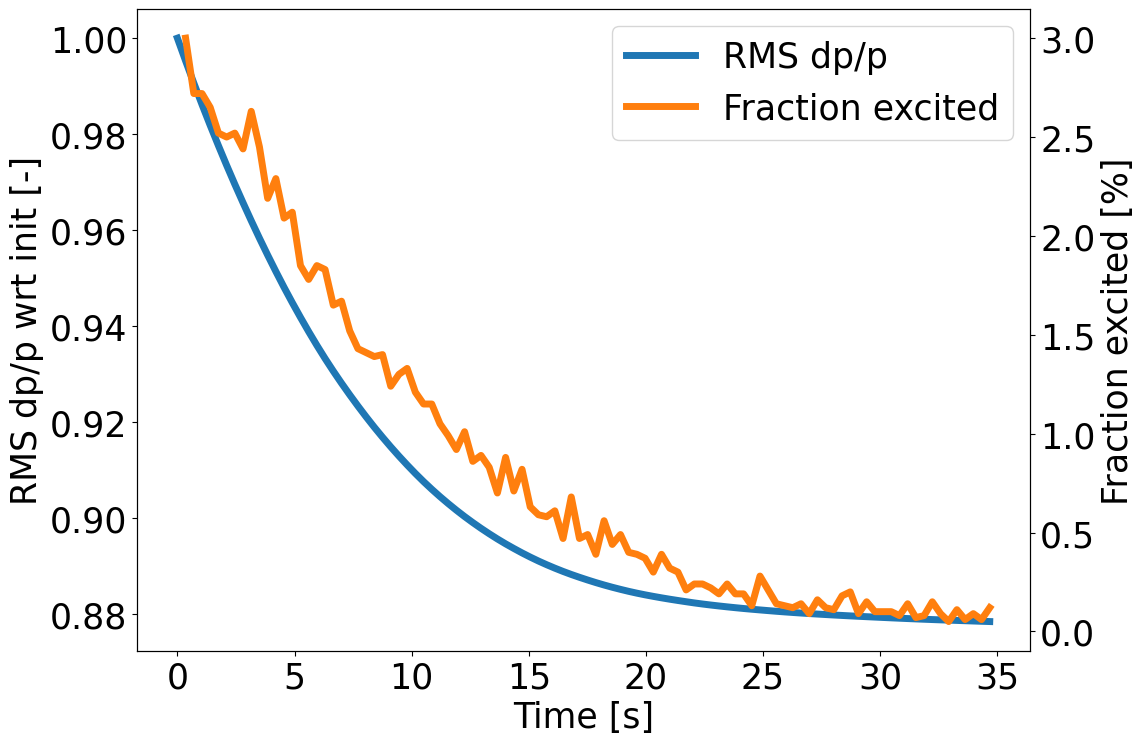

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# revolution_frequency = 200 * 1e6
# s_per_turn = 1 / revolution_frequency
# num_turns = time / s_per_turn

cmap = plt.get_cmap("tab10")

# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

# Plot the first dataset on the first axis
ax1.plot(time, delta_std/delta_std[0], label='RMS dp/p', color=cmap(0), linewidth=5.0)
ax1.set_xlabel('Turns')
ax1.set_ylabel('RMS dp/p wrt init [-]')

# Create a second axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset on the second axis
ax2.plot(time[1:], fraction_excited[1:], label='Fraction excited', color=cmap(1), linewidth=5.0)
ax2.set_ylabel('Fraction excited [%]')

# Add legends for both datasets
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')

# Set the common x-axis label
ax1.set_xlabel('Time [s]')
plt.tight_layout()
plt.savefig('Fraction_excitation.eps', format='eps', dpi=300)
plt.show()


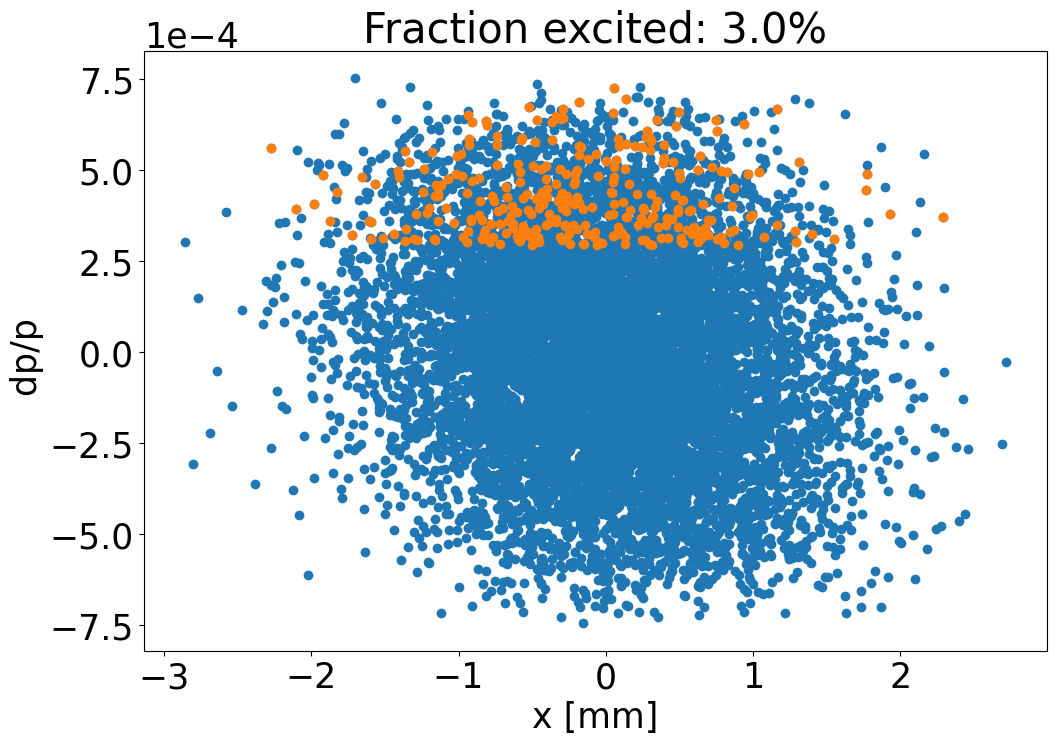

In [4]:
turn=1
excited0=excited[turn,:]
fraction_excitation0 = sum(excited0)/len(excited0)*100


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

#plt.axvline(laser_x,color='red')
# plt.axvline(laser_x+laser_waist_radius,color='red')
# plt.axvline(laser_x-laser_waist_radius,color='red')

plt.scatter(x[turn],delta[turn])
plt.scatter(x[turn][excited0],delta[turn][excited0])
plt.xlabel('x [mm]')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('First_turn.eps', format='eps', dpi=300)
plt.show()

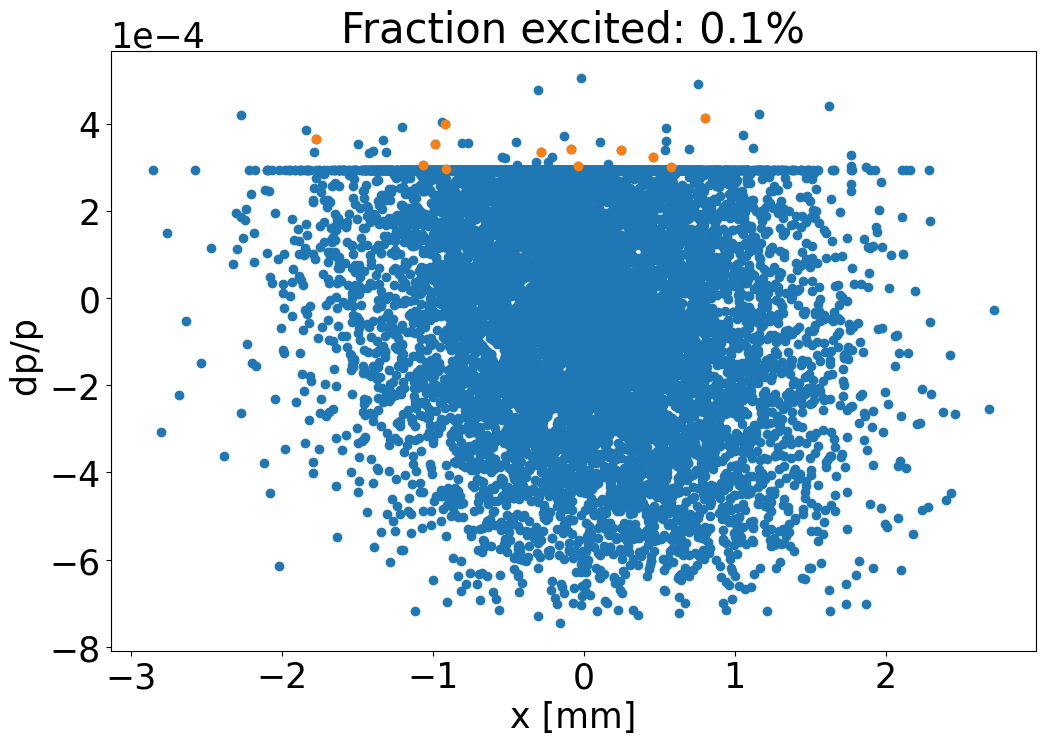

In [5]:
turn=-1
excited0=excited[turn,:]
fraction_excitation0 = sum(excited0)/len(excited0)*100


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

#plt.axvline(laser_x,color='red')
# plt.axvline(laser_x+laser_waist_radius,color='red')
# plt.axvline(laser_x-laser_waist_radius,color='red')

plt.scatter(x[turn],delta[turn])
plt.scatter(x[turn][excited0],delta[turn][excited0])
plt.xlabel('x [mm]')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('Last_turn.eps', format='eps', dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


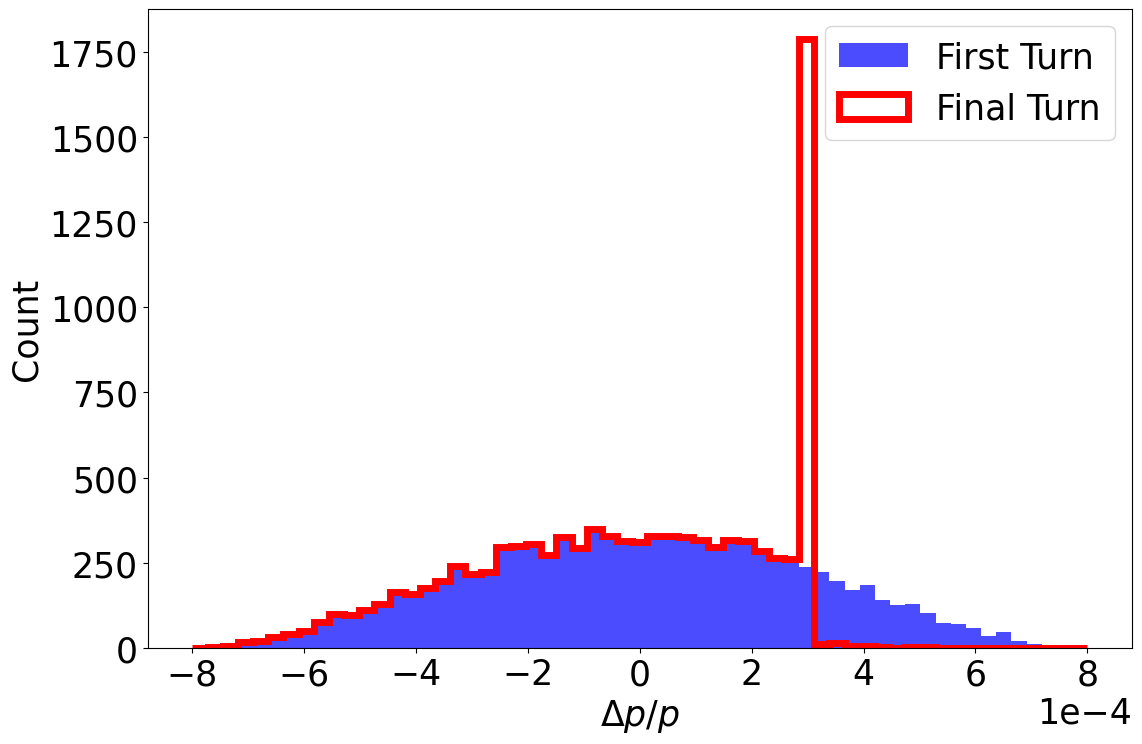

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Extract delta at the first turn (assuming the first turn is at index 0)
delta_first_turn = delta[0, :]

# Extract delta at the final turn
delta_final_turn = delta[-1, :]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

# Plot histograms for delta at the first and final turns
bins=np.linspace(-8e-4, 8e-4,60)
# plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn')
# plt.hist(delta_final_turn, bins=bins, color='darkorange', alpha=0.0, label='Final Turn')
plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn',  linewidth=5)
plt.hist(delta_final_turn, bins=bins, color='red', alpha=1, label='Final Turn', histtype='step', linewidth=5)

plt.xlabel(r'$\Delta p/p$')


plt.xlabel(r'$\Delta p/p$')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.savefig('Histogram_comparison.eps', format='eps', dpi=300)
plt.show()


In [7]:
bins

array([-8.00000000e-04, -7.72881356e-04, -7.45762712e-04, -7.18644068e-04,
       -6.91525424e-04, -6.64406780e-04, -6.37288136e-04, -6.10169492e-04,
       -5.83050847e-04, -5.55932203e-04, -5.28813559e-04, -5.01694915e-04,
       -4.74576271e-04, -4.47457627e-04, -4.20338983e-04, -3.93220339e-04,
       -3.66101695e-04, -3.38983051e-04, -3.11864407e-04, -2.84745763e-04,
       -2.57627119e-04, -2.30508475e-04, -2.03389831e-04, -1.76271186e-04,
       -1.49152542e-04, -1.22033898e-04, -9.49152542e-05, -6.77966102e-05,
       -4.06779661e-05, -1.35593220e-05,  1.35593220e-05,  4.06779661e-05,
        6.77966102e-05,  9.49152542e-05,  1.22033898e-04,  1.49152542e-04,
        1.76271186e-04,  2.03389831e-04,  2.30508475e-04,  2.57627119e-04,
        2.84745763e-04,  3.11864407e-04,  3.38983051e-04,  3.66101695e-04,
        3.93220339e-04,  4.20338983e-04,  4.47457627e-04,  4.74576271e-04,
        5.01694915e-04,  5.28813559e-04,  5.55932203e-04,  5.83050847e-04,
        6.10169492e-04,  